In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn  import tree
from sklearn.metrics import confusion_matrix

In [2]:
import xlrd
dt=pd.read_excel(r'C:\Users\user\Downloads\phasesdata.xlsx')
print(dt)

                       Alloy  Diff. Lattice Constants  Diff. Melting Point  \
0            Al0.5CoCrCuFeNi                 0.487880           346.087653   
1              Al0.3CoCrFeNi                 0.449913           295.639150   
2             Al0.5CrCuFeNi2                 0.381975           344.853267   
3                  CoCrFeNi                  0.365443           180.372358   
4                     NiCoCr                 0.418117           204.299411   
..                       ...                      ...                  ...   
335            Al0.4FeCrNiCo                 0.470076           319.897733   
336     Co30Cr10Fe10Al18Ni32                 0.610407           372.252972   
337   Co30Cr10Fe10Al18Ni31Mo                 0.609473           392.286696   
338  Co30Cr10Fe10Al18Ni30Mo2                 0.608515           411.014093   
339  Co30Cr10Fe10Al18Ni29Mo3                 0.607532           428.606431   

     Mixing Enthalpy  Mean Lattice Constants   delta r     Omeg

In [3]:
df=dt.drop(columns =['Alloy'])
df

,Diff. Lattice Constants,Diff. Melting Point,Mixing Enthalpy,Mean Lattice Constants,delta r,Omega,Melting Temp.,Diff. Electronegativity,Mixing Entropy,Valence electron,lambda,Phase
0,0.487880,346.087653,-4.833816,3.172259,4.169229,5.147913,1693.017839,0.109326,14.698051,8.27281,0.845568,2
1,0.449913,295.639150,-9.907111,3.028509,3.757616,2.338500,1806.304922,0.107517,12.826063,7.88379,0.908382,2
2,0.381975,344.853267,-5.832712,3.357152,4.199646,3.642274,1685.745039,0.113094,12.602340,8.45463,0.714539,2
3,0.365443,180.372358,-3.701000,2.951900,0.302116,5.829327,1871.750000,0.096695,11.526293,8.25000,126.282298,2
4,0.418117,204.299411,-5.023455,2.980337,0.164559,3.440270,1891.981080,0.111454,9.134363,8.33325,337.314058,2
...,...,...,...,...,...,...,...,...,...,...,...,...
335,0.470076,319.897733,-11.595777,3.051653,4.224214,2.004506,1786.432248,0.110202,13.011300,7.77264,0.729170,2
336,0.610407,372.252972,-18.545592,3.186370,5.679773,1.106226,1650.484600,0.124374,12.430051,7.84000,0.385311,3
337,0.609473,392.286696,-18.549255,3.182600,5.702704,1.146988,1662.164600,0.128716,12.800040,7.80000,0.393595,3
338,0.608515,411.014093,-18.547158,3.178830,5.724050,1.177925,1673.844600,0.132868,13.052084,7.76000,0.398358,3


In [4]:
df.head(15)

,Diff. Lattice Constants,Diff. Melting Point,Mixing Enthalpy,Mean Lattice Constants,delta r,Omega,Melting Temp.,Diff. Electronegativity,Mixing Entropy,Valence electron,lambda,Phase
0,0.487880,346.087653,-4.833816,3.172259,4.169229,5.147913,1693.017839,0.109326,14.698051,8.27281,0.845568,2
1,0.449913,295.639150,-9.907111,3.028509,3.757616,2.338500,1806.304922,0.107517,12.826063,7.88379,0.908382,2
2,0.381975,344.853267,-5.832712,3.357152,4.199646,3.642274,1685.745039,0.113094,12.602340,8.45463,0.714539,2
3,0.365443,180.372358,-3.701000,2.951900,0.302116,5.829327,1871.750000,0.096695,11.526293,8.25000,126.282298,2
4,0.418117,204.299411,-5.023455,2.980337,0.164559,3.440270,1891.981080,0.111454,9.134363,8.33325,337.314058,2
5,0.328750,41.500000,-1.500000,3.195250,0.201045,6.798592,1769.500000,0.040000,5.763146,9.00000,142.584187,2
6,0.421050,33.891816,-1.012869,2.965837,0.327645,15.953230,1768.982310,0.032998,9.134363,8.99991,85.088297,2
7,0.508450,20.000000,-0.218000,3.015550,0.200240,46.210916,1748.000000,0.015000,5.763146,9.50000,143.733060,2
8,0.526293,392.256328,-10.382193,3.245398,5.281183,2.338551,1629.739261,0.119083,14.897649,7.83349,0.534140,3
9,0.487880,346.087653,-4.833816,3.172259,4.169229,5.147913,1693.017839,0.109326,14.698051,8.27281,0.845568,2


In [5]:
x=df.drop(columns =['Phase'])
x

,Diff. Lattice Constants,Diff. Melting Point,Mixing Enthalpy,Mean Lattice Constants,delta r,Omega,Melting Temp.,Diff. Electronegativity,Mixing Entropy,Valence electron,lambda
0,0.487880,346.087653,-4.833816,3.172259,4.169229,5.147913,1693.017839,0.109326,14.698051,8.27281,0.845568
1,0.449913,295.639150,-9.907111,3.028509,3.757616,2.338500,1806.304922,0.107517,12.826063,7.88379,0.908382
2,0.381975,344.853267,-5.832712,3.357152,4.199646,3.642274,1685.745039,0.113094,12.602340,8.45463,0.714539
3,0.365443,180.372358,-3.701000,2.951900,0.302116,5.829327,1871.750000,0.096695,11.526293,8.25000,126.282298
4,0.418117,204.299411,-5.023455,2.980337,0.164559,3.440270,1891.981080,0.111454,9.134363,8.33325,337.314058
...,...,...,...,...,...,...,...,...,...,...,...
335,0.470076,319.897733,-11.595777,3.051653,4.224214,2.004506,1786.432248,0.110202,13.011300,7.77264,0.729170
336,0.610407,372.252972,-18.545592,3.186370,5.679773,1.106226,1650.484600,0.124374,12.430051,7.84000,0.385311
337,0.609473,392.286696,-18.549255,3.182600,5.702704,1.146988,1662.164600,0.128716,12.800040,7.80000,0.393595
338,0.608515,411.014093,-18.547158,3.178830,5.724050,1.177925,1673.844600,0.132868,13.052084,7.76000,0.398358


In [6]:
y=df['Phase']
y

0      2
1      2
2      2
3      2
4      2
      ..
335    2
336    3
337    3
338    3
339    3
Name: Phase, Length: 340, dtype: int64

# decision tree

In [7]:
DT=tree.DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1,shuffle=False)
DT=tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=5, min_samples_split=3, min_samples_leaf=2, min_weight_fraction_leaf=0.0, max_features=None, random_state=42, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)
DT.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=3,
                       random_state=42)

In [8]:
DT.score(X_test,y_test)

0.6470588235294118

In [9]:
DT.score(X_train,y_train)

0.8823529411764706

# gradient boosting classifier

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1,shuffle=False)

In [11]:
lr_list = [0.01, 0.05, 0.075, 0.1, 0.25, 0.5, 0.75,0.7, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.01
Accuracy score (training): 0.673
Accuracy score (validation): 0.618
Learning rate:  0.05
Accuracy score (training): 0.791
Accuracy score (validation): 0.618
Learning rate:  0.075
Accuracy score (training): 0.827
Accuracy score (validation): 0.647
Learning rate:  0.1
Accuracy score (training): 0.850
Accuracy score (validation): 0.706
Learning rate:  0.25
Accuracy score (training): 0.912
Accuracy score (validation): 0.618
Learning rate:  0.5
Accuracy score (training): 0.958
Accuracy score (validation): 0.618
Learning rate:  0.75
Accuracy score (training): 0.971
Accuracy score (validation): 0.618
Learning rate:  0.7
Accuracy score (training): 0.971
Accuracy score (validation): 0.588
Learning rate:  1
Accuracy score (training): 0.974
Accuracy score (validation): 0.559


In [12]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[12  0  3]
 [ 0  4  0]
 [ 6  1  8]]
Classification Report
              precision    recall  f1-score   support

           1       0.67      0.80      0.73        15
           2       0.80      1.00      0.89         4
           3       0.73      0.53      0.62        15

    accuracy                           0.71        34
   macro avg       0.73      0.78      0.74        34
weighted avg       0.71      0.71      0.70        34



# Support vector machine classifier

In [13]:
df1=df[df.Phase==1]
df2=df[df.Phase==2]
df3=df[df.Phase==3]

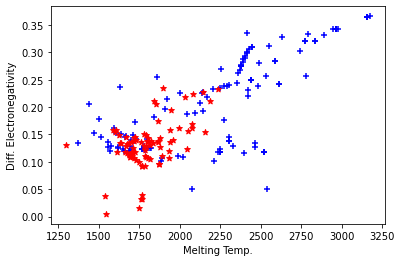

In [14]:
plt.xlabel('Melting Temp.')
plt.ylabel('Diff. Electronegativity')
plt.scatter(df1['Melting Temp.'],df1['Diff. Electronegativity'],color='blue',marker='+')
plt.scatter(df2['Melting Temp.'],df2['Diff. Electronegativity'],color='red',marker='*')

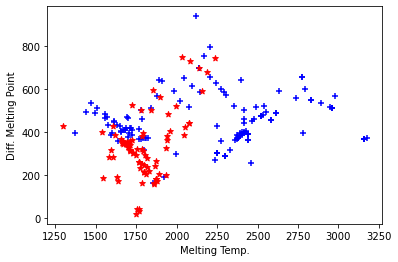

In [15]:
plt.xlabel('Melting Temp.')
plt.ylabel('Diff. Melting Point')
plt.scatter(df1['Melting Temp.'],df1['Diff. Melting Point'],color='blue',marker='+')
plt.scatter(df2['Melting Temp.'],df2['Diff. Melting Point'],color='red',marker='*')

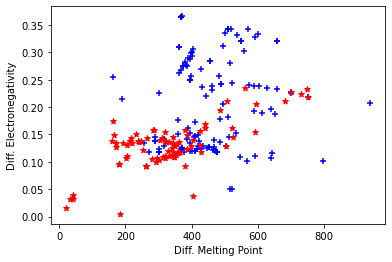

In [16]:
plt.xlabel('Diff. Melting Point')
plt.ylabel('Diff. Electronegativity')
plt.scatter(df1['Diff. Melting Point'],df1['Diff. Electronegativity'],color='blue',marker='+')
plt.scatter(df2['Diff. Melting Point'],df2['Diff. Electronegativity'],color='red',marker='*')

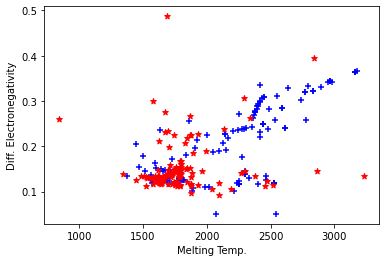

In [17]:
plt.xlabel('Melting Temp.')
plt.ylabel('Diff. Electronegativity')
plt.scatter(df1['Melting Temp.'],df1['Diff. Electronegativity'],color='blue',marker='+')
plt.scatter(df3['Melting Temp.'],df3['Diff. Electronegativity'],color='red',marker='*')

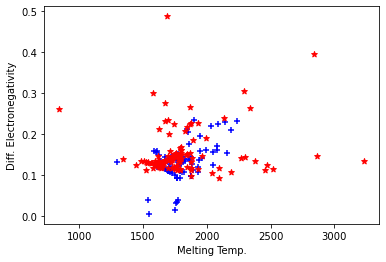

In [18]:
plt.xlabel('Melting Temp.')
plt.ylabel('Diff. Electronegativity')
plt.scatter(df2['Melting Temp.'],df2['Diff. Electronegativity'],color='blue',marker='+')
plt.scatter(df3['Melting Temp.'],df3['Diff. Electronegativity'],color='red',marker='*')

In [19]:
x=df.iloc[:,6:8]
y=df['Phase']
x.head(50)

,Melting Temp.,Diff. Electronegativity
0,1693.017839,0.109326
1,1806.304922,0.107517
2,1685.745039,0.113094
3,1871.750000,0.096695
4,1891.981080,0.111454
5,1769.500000,0.040000
6,1768.982310,0.032998
7,1748.000000,0.015000
8,1629.739261,0.119083
9,1693.017839,0.109326


In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.02,shuffle=False)

In [21]:
from sklearn.svm import SVC
model=SVC()

In [22]:
model.fit(X_train,y_train)

SVC()

In [23]:
model.score(X_test,y_test)

0.8571428571428571

In [24]:
model.score(X_train,y_train)

0.5465465465465466

In [25]:
model.predict([[1685.524600,0.136849]])

array([3], dtype=int64)